# Introduction
This project will be looking at financial lending data from the Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Borrowers who request a loan are assigned an interest rate, which is a metric of the risk of lending a loan to the borrower. Investors can choose to back, or fund, loans if they believe they can receive a return on their investments. 

If a loan is approved, the borrower makes monthly payments to the Lending Club for either over 36 months or over 60 months. Lending Club redistributes these payments to the investors, who will see a return corresponding to the borrower's interest rate if the loan is fully paid off on time. Many loans, however, aren't compeletely paid off on time, and borrowers default on the loan. The figure below, from [Bible Money Matters](http://www.biblemoneymatters.com/introduction-to-peer-to-peer-lending-signing-up-to-use-lending-club/), sums up this process.

<img src="how-social-lending-works.jpg" width="600" />

Investors will want to be savvy about determining which loans are likely to be paid off. Investors can play it safe and only put money into low interest loans, but they can also put money into high interest loans due to the higher interest. Many investors use a portfolio strategy to invest small amounts in many loans, with mixes of low, medium, and interest loans.

Hypothetically, let's say through outsourcing, we are a firm asked to provide a machine learning solution to the Lending Club. Let's say there is a desire to automate and speed up the loan underwriting process so that the Lending Club can process more loan applications without hiring additional personnel, contributing to profits. 

# Data Exploration and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style("ticks")
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [2]:
import re

decimal_num = re.compile(r'[^-\d.]+')

def force_float(string):
    """
    Converts a string of a number into a float. For instance, may remove units.
    Will return np.nan if the input is a non-numeric string.
    """
    if not isinstance(string, str):
        return np.nan 
    
    subbed_string = decimal_num.sub('', string)
    try:
        float_string = float(subbed_string)
        return float_string
    except ValueError:
        return np.nan

We will be examining loan applications from 2015, contained in "LoanStats3d".

In [3]:
# Skip first line of LoanStats3d.csv, as it contains extraneous text 
# that prevents the dataset from being parsed by pandas
loans_df = pd.read_csv('LoanStats3d.csv.zip', skiprows = 1, compression='zip')

print('Shape of 2015 dataset:')
print(loans_df.shape)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Shape of 2015 dataset:
(421097, 145)


In [4]:
loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.00,0.00,29939.017729,29939.02,28000.00,1939.02,0.0,0.00,0.0000,May-2017,17093.51,NaN,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,NaN,NaN,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,NaN,NaN,7.0,0.0,12900.0,102.4%,25.0,w,10353.94,10353.94,14838.420000,14838.42,7246.06,7592.36,0.0,0.00,0.0000,Sep-2018,465.22,Oct-2018,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,133285.0,0.0,4.0,0.0,1.0,13.0,120385.0,83.0,0.0,0.0,5998.0,91.0,12600.0,0.0,1.0,0.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,NaN,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,RENT,40000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,NaN,

The business problem is to develop a model that can predict whether or not a loan will be defaulted or not. The dataset of applications can train a model on what attributes of loan applications are indicative of default behavior or not. We will be interested in identifying a target column that indicates the loan status. We can see that there is a column named "loan_status"

In [5]:
loans_df['loan_status'].value_counts()

Fully Paid            262098
Current                81903
Charged Off            71380
Late (31-120 days)      3074
In Grace Period         2017
Late (16-30 days)        617
Default                    6
Name: loan_status, dtype: int64

What do these labels mean?
- Fully Paid: The loan was fully paid. This is indicative of a successful loan application.
- Charged Off: This is a declaration by a creditor that an amount of the debt is unlikely to be collected. Traditionally, this declaration is made at six months without payment. This would be our definition of a loan being defaulted.
- Current: The loan is up to date on current payments. This is an ongoing loan, so the jury is out regarding whether or not this loan is likely to be successful or defaulted. 
- Late: Loan has not been paid for the specified period of time. 
- In Grace Period: The loan is past its due date, but we are still within the grace period of 15 days (after which it would be marked Late)
- Default

In [6]:
loan_status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1
}

filtered_loans_df = loans_df[(loans_df['loan_status']=='Fully Paid') |
                           (loans_df['loan_status']=='Charged Off') |
                           (loans_df['loan_status']=='Default')].reset_index(drop=True)

filtered_loans_df['loan_status'] = filtered_loans_df['loan_status'].map(loan_status_mapping)

print(filtered_loans_df.shape)
filtered_loans_df['loan_status'].value_counts()

(333484, 145)


0    262098
1     71386
Name: loan_status, dtype: int64

If we plot out the number of data points that are labeled 0 or 1 under loan_status, we see that the defaulted loans (loan_status = 1) are in the minority.

Text(0.5, 0, 'loan_status')

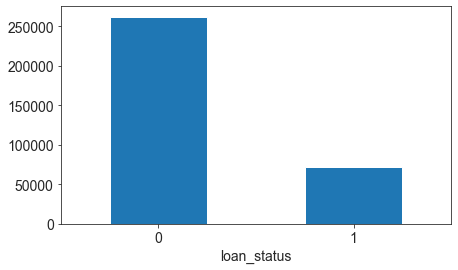

In [7]:
fig,ax = plt.subplots(figsize=(7,4))
filtered_loans_df['loan_status'].value_counts().plot.bar(ax=ax)
plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel('loan_status', size=14)

Now let us take a look at our dataset again.

In [8]:
filtered_loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,0,n,NaN,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.0,0.0,29939.017729,29939.02,28000.00,1939.02,0.0,0.00,0.0000,May-2017,17093.51,NaN,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,RENT,40000.0,Not Verified,Dec-2015,0,n,NaN,NaN,credit_card,Credit card refinancing,070xx,NJ,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4%,22.0,w,0.0,0.0,13096.732227,13096.73,12000.00,1096.73,0.0,0.00,0.0000,Jan-2017,8659.70,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,0

We notice that the "id" and "member_id" columns seem to have many missing values. Even if they did not have missing values, they would likely be the ID column that would not provide much signal about the loan applications. Let us see how sparse these columns are.

In [9]:
filtered_loans_df[['id', 'member_id']].notnull().sum()

id           0
member_id    0
dtype: int64

We see that in this filtered dataset, "id" and "member_id" are completely empty. How many other columns are completely empty?

In [10]:
empty_cols = [c for c in filtered_loans_df.columns if filtered_loans_df[c].notnull().sum() == 0]
empty_cols

['id',
 'member_id',
 'url',
 'revol_bal_joint',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog']

It would be in our best interest to remove these columns.

In [11]:
filtered_loans_df.drop(columns=empty_cols, inplace=True)

print(filtered_loans_df.shape)

filtered_loans_df.head()

(333484, 131)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.0,0.0,29939.017729,29939.02,28000.00,1939.02,0.0,0.00,0.0000,May-2017,17093.51,NaN,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,12000.0,12000.0,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,RENT,40000.0,Not Verified,Dec-2015,0,n,NaN,credit_card,Credit card refinancing,070xx,NJ,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4%,22.0,w,0.0,0.0,13096.732227,13096.73,12000.00,1096.73,0.0,0.00,0.0000,Jan-2017,8659.70,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8%,31.0,w,0.0,0.0,34309.150000,34309.15,33600.00,709.15,0.0,0.00,0.0000,Mar-2016,33262.93,NaN,Mar-2016,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.

At first glance, it would also be in our best interest to remove "funded_amnt" and "funded_amnt_inv", as these features may leak information from the future. These are values determined after a loan is funded, and would not be applicable if we wish to automate the process of evaluating loans.

In [12]:
filtered_loans_df.drop(columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)
filtered_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.0,0.0,29939.017729,29939.02,28000.00,1939.02,0.0,0.00,0.0000,May-2017,17093.51,NaN,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,RENT,40000.0,Not Verified,Dec-2015,0,n,NaN,credit_card,Credit card refinancing,070xx,NJ,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4%,22.0,w,0.0,0.0,13096.732227,13096.73,12000.00,1096.73,0.0,0.00,0.0000,Jan-2017,8659.70,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8%,31.0,w,0.0,0.0,34309.150000,34309.15,33600.00,709.15,0.0,0.00,0.0000,Mar-2016,33262.93,NaN,Mar-2016,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3

We believe that there may be a correlation between the grade and int_rate. 

In [13]:
filtered_loans_df['grade'].value_counts()

C    93252
B    92858
A    63032
D    48635
E    26254
F     7648
G     1805
Name: grade, dtype: int64

In [14]:
grade_int_rate_df = filtered_loans_df[['int_rate', 'grade', 'sub_grade', 'term']]
grade_int_rate_df['int_rate'] = grade_int_rate_df['int_rate'].apply(force_float)

grade_int_rate_df.head()

<ipython-input-14-9177aa2f4bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_int_rate_df['int_rate'] = grade_int_rate_df['int_rate'].apply(force_float)


,int_rate,grade,sub_grade,term
0,6.49,A,A2,36 months
1,10.78,B,B4,36 months
2,10.78,B,B4,36 months
3,16.59,D,D2,60 months
4,7.49,A,A4,36 months


"sub_grade" appears to be the grade at a finer level of detail. It appears that the higher the interest rate, the lower the grade (closer to G than to A).

Text(0.5, 1.0, 'Interest Rate by Grade')

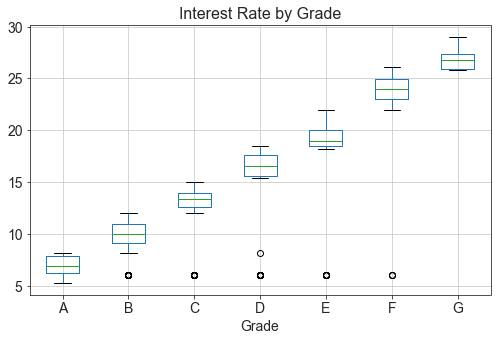

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

grade_int_rate_df.boxplot(column='int_rate', by='grade', ax=ax)
fig.suptitle('')
plt.xticks(size=14, rotation=0)
plt.yticks(size=14, rotation=0)
plt.xlabel('Grade', size=14)
plt.title('Interest Rate by Grade', size=16)

Text(0.5, 1.0, 'Interest Rate by Sub Grade')

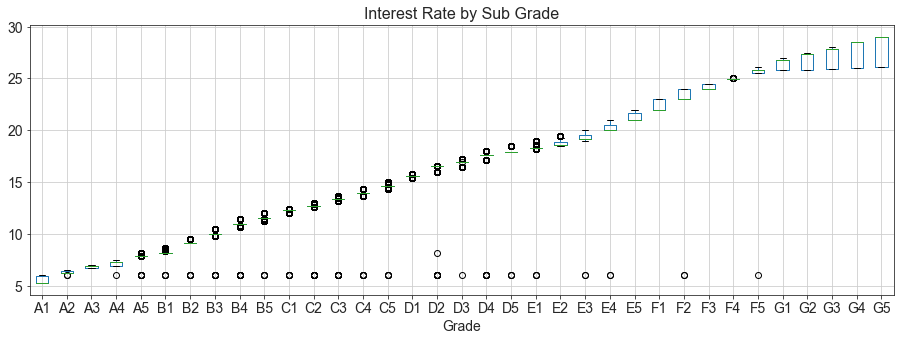

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

grade_int_rate_df.boxplot(column='int_rate', by='sub_grade', ax=ax)
fig.suptitle('')
plt.xticks(size=14, rotation=0)
plt.yticks(size=14, rotation=0)
plt.xlabel('Grade', size=14)
plt.title('Interest Rate by Sub Grade', size=16)

On average, we observe a direct relationship between the interest rate and grade. We can make the same observation for the interest rate and sub grade. 

That being said, we may want to, in fact, drop the interest rate and grade features. These are determined by the Lending Club from the application, particularly the applicants' credit usage, loan term, loan amount, income, and debt. The Lending Club may use a loan application classifier to help filter which applications should receive higher interest rates and lower grades, but this information may not be known _a priori_ during the loan underwriting process. 

In [17]:
filtered_loans_df.groupby(by='grade')['loan_status'].value_counts(normalize=True).unstack(level=0)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,0.939443,0.859312,0.763737,0.665817,0.571494,0.479341,0.452632
1,0.060557,0.140688,0.236263,0.334183,0.428506,0.520659,0.547368


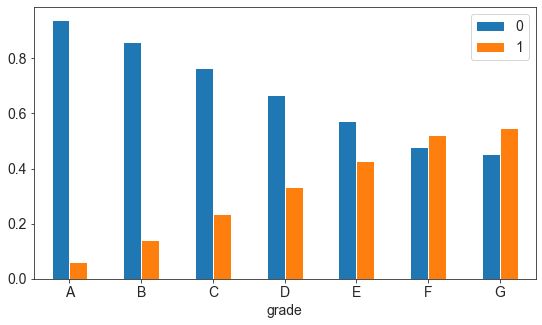

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
filtered_loans_df.groupby(by='grade')['loan_status'].value_counts(normalize=True).unstack().plot.bar(ax=ax)
plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel('grade', size=14)
plt.legend(prop={'size': 14})

While we are determining that the grade columns (and the proportional interest rates) may not be appropriate to include in our modeling, we do note the relationship between the grades/interest rates and the likelihood of default. 

Likewise, we may have to drop the "term" variable, considering it was likely determined by the Lending Club investors after evaluating the applications. We notice that there tends to be a relationship between the determined interest rates and the loan terms.

Text(0.5, 1.0, 'Interest Rate by Term')

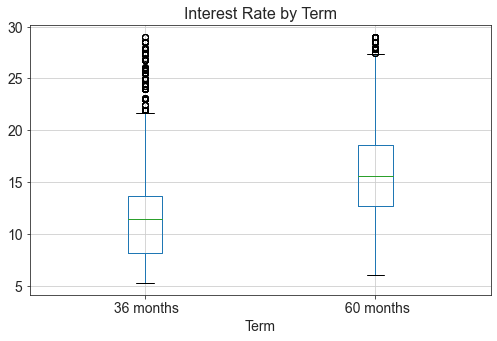

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

grade_int_rate_df.boxplot(column='int_rate', by='term', ax=ax)
fig.suptitle('')
plt.xticks(size=14, rotation=0)
plt.yticks(size=14, rotation=0)
plt.xlabel('Term', size=14)
plt.title('Interest Rate by Term', size=16)

Longer loan terms come with higher interest rates. The "term" feature would have likely been a useful predictor feature if the term were known prior to the application rather than determined during the underwriting process.

Text(0.5, 0, 'Term')

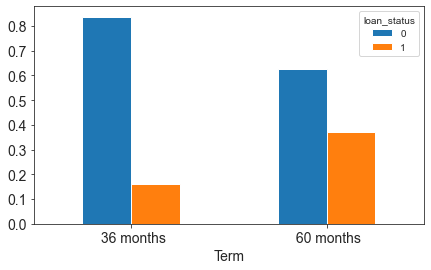

In [20]:
fig, ax = plt.subplots(figsize=(7,4))
filtered_loans_df.groupby(by='term')['loan_status'].value_counts(normalize=True).unstack().plot.bar(ax=ax)
plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel('Term', size=14)

In [21]:
filtered_loans_df.drop(columns=['int_rate', 'grade', 'sub_grade', 'term'], inplace=True)

filtered_loans_df.head()

,loan_amnt,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,28000.0,858.05,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.0,0.0,29939.017729,29939.02,28000.00,1939.02,0.0,0.00,0.0000,May-2017,17093.51,NaN,Sep-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,12000.0,391.62,Salesman,3 years,RENT,40000.0,Not Verified,Dec-2015,0,n,NaN,credit_card,Credit card refinancing,070xx,NJ,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4%,22.0,w,0.0,0.0,13096.732227,13096.73,12000.00,1096.73,0.0,0.00,0.0000,Jan-2017,8659.70,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,33600.0,1096.53,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,0,n,NaN,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8%,31.0,w,0.0,0.0,34309.150000,34309.15,33600.00,709.15,0.0,0.00,0.0000,Mar-2016,33262.93,NaN,Mar-2016,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Are there any additional features that may leak information from the future, after a loan is funded? These would be feature that may refer to how a loan was funded or details pertaining to payments made or to be scheduled for the funded loan (which are irrelevant to the application process). We can also identify columns which may not be of much use to us for analysis or modeling. This is based off of information provided by the data dictionary. 

One feature we wish to drop eventually is "issue_d", but we may use this for feature engineering before dropping it.

The features to drop are listed in drop_cols. The features either leak or are redundant with other features (while having finer granularity).

In [22]:
drop_cols = ['pymnt_plan', 'desc', 'zip_code', 'addr_state', 'out_prncp', 'issue_d',
             'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
             'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
             'last_pymnt_d', 'next_pymnt_d', 'last_pymnt_amnt', 'debt_settlement_flag',
             'debt_settlement_flag_date', 'orig_projected_additional_accrued_interest',
             'deferral_term', 'payment_plan_start_date', 'last_credit_pull_d'] + \
            [c for c in filtered_loans_df if 'hardship' in c] + \
            [c for c in filtered_loans_df if 'settlement' in c]

filtered_loans_proc_df = filtered_loans_df.drop(columns=drop_cols)

print(filtered_loans_proc_df.shape)

filtered_loans_proc_df.head()

(333484, 85)


,loan_amnt,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,28000.0,858.05,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,0,debt_consolidation,Debt consolidation,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5%,24.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,Cash
1,12000.0,391.62,Salesman,3 years,RENT,40000.0,Not Verified,0,credit_card,Credit card refinancing,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4%,22.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,Cash
2,33600.0,1096.53,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,0,debt_consolidation,Debt consolidation,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8%,31.0,w,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,Cash
3,11550.0,284.51,general manager,5 years,RENT,38000.0,Not Verified,1,credit_card,Credit card refinancing,21.07,0.0,Jan-2011,0.0,NaN,NaN,9.0,0.0,7179.0,39.7%,12.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0,Cash
4,25000.0,777.55,Sales Manager,10+ years,MORTGAGE,109000.0,Not Verified,0,debt_consolidation,Debt consolidation,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3%,19.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,Cash


Two features to highlight are "recoveries" and "collection_recovery_fee", which pertain to payments made for charge-offs, which is how we are defining a loan defaulting. We can verify this:

In [23]:
# Statistics of "recoveries" for paid off loans
filtered_loans_df[filtered_loans_df['loan_status']==0]['recoveries'].describe()

count    262098.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: recoveries, dtype: float64

In [24]:
filtered_loans_df[filtered_loans_df['loan_status']==1]['recoveries'].describe()

count    71386.000000
mean      1181.778724
std       1818.427377
min          0.000000
25%          0.000000
50%        616.185000
75%       1650.000000
max      35581.880000
Name: recoveries, dtype: float64

We have also removed features related to hardships and settlements. These would refer to borrowers being on a hardship plan and settlement plan, situations that are applicable only after a loan is funded.

In [25]:
filtered_loans_proc_df['emp_length'] = filtered_loans_proc_df['emp_length'].replace({'< 1 year': '0'})
numeric_unit_cols = ['emp_length', 'revol_util']

filtered_loans_proc_df[numeric_unit_cols] = filtered_loans_proc_df[numeric_unit_cols].applymap(force_float)
filtered_loans_proc_df.head()

,loan_amnt,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,28000.0,858.05,Senior Manager,10.0,MORTGAGE,92000.0,Not Verified,0,debt_consolidation,Debt consolidation,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5,24.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,Cash
1,12000.0,391.62,Salesman,3.0,RENT,40000.0,Not Verified,0,credit_card,Credit card refinancing,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4,22.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,Cash
2,33600.0,1096.53,Aviation Safety Inspector,8.0,RENT,104000.0,Source Verified,0,debt_consolidation,Debt consolidation,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,w,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,Cash
3,11550.0,284.51,general manager,5.0,RENT,38000.0,Not Verified,1,credit_card,Credit card refinancing,21.07,0.0,Jan-2011,0.0,NaN,NaN,9.0,0.0,7179.0,39.7,12.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0,Cash
4,25000.0,777.55,Sales Manager,10.0,MORTGAGE,109000.0,Not Verified,0,debt_consolidation,Debt consolidation,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3,19.0,w,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,Cash


Let us see if there are features with zero or one single unique value.

In [26]:
filtered_loans_proc_df[[c for c in filtered_loans_proc_df if filtered_loans_proc_df[c].nunique() <= 1]].head()

,policy_code,verification_status_joint,disbursement_method
0,1.0,NaN,Cash
1,1.0,NaN,Cash
2,1.0,NaN,Cash
3,1.0,NaN,Cash
4,1.0,NaN,Cash


We may not learn much from the policy code and disbursement method. For instance, it appears that all applicants will receive their loan via cash in this dataset, and all of the policies are publicly available in this dataset. We will keep "verification_status_joint" for now.

In [27]:
filtered_loans_proc_df.drop(columns=['policy_code', 'disbursement_method'],
                           inplace=True)

print(filtered_loans_proc_df.shape)

filtered_loans_proc_df.head()

(333484, 83)


,loan_amnt,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,28000.0,858.05,Senior Manager,10.0,MORTGAGE,92000.0,Not Verified,0,debt_consolidation,Debt consolidation,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5,24.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
1,12000.0,391.62,Salesman,3.0,RENT,40000.0,Not Verified,0,credit_card,Credit card refinancing,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4,22.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0
2,33600.0,1096.53,Aviation Safety Inspector,8.0,RENT,104000.0,Source Verified,0,debt_consolidation,Debt consolidation,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,w,0.0,29.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0
3,11550.0,284.51,general manager,5.0,RENT,38000.0,Not Verified,1,credit_card,Credit card refinancing,21.07,0.0,Jan-2011,0.0,NaN,NaN,9.0,0.0,7179.0,39.7,12.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0
4,25000.0,777.55,Sales Manager,10.0,MORTGAGE,109000.0,Not Verified,0,debt_consolidation,Debt consolidation,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3,19.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0


We note that there are two categorical values for "application_type": Individual and Joint App.

In [28]:
filtered_loans_proc_df['application_type'].value_counts()

Individual    333179
Joint App        305
Name: application_type, dtype: int64

Joint applications involve co-borrowers whose financial information is considered together with the applicant's. This could be useful if the loan amount is higher, and may aid the application. We note there are a few features with the suffix "joint".

In [29]:
filtered_loans_proc_df[[c for c in filtered_loans_proc_df if c.endswith('_joint')]].head()

,annual_inc_joint,dti_joint,verification_status_joint
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


If there are values in these columns for joint applications, we will replace their corresponding values in the base features (like replacing the annual income with annual_inc_joint, as this consolidated annual income may be considered for this joint application instead).

In [30]:
def process_joint(row):
    joint_cols = ['annual_inc', 'dti', 'verification_status']
    for col in joint_cols:
        if row[col + '_joint'] is not None:
            row[col] = row[col + '_joint']
    return row

In [31]:
filtered_loans_proc_df.loc[filtered_loans_proc_df['application_type']=='Joint App'] = \
filtered_loans_proc_df.loc[filtered_loans_proc_df['application_type']=='Joint App'].apply(process_joint, axis=1)

filtered_loans_proc_df.loc[filtered_loans_proc_df['application_type']=='Joint App'][['annual_inc', 'annual_inc_joint', 'dti', 'dti_joint', 'verification_status', 'verification_status_joint']].head()

,annual_inc,annual_inc_joint,dti,dti_joint,verification_status,verification_status_joint
22,71000.00,71000.00,13.85,13.85,Not Verified,Not Verified
285,77000.00,77000.00,15.40,15.40,Not Verified,Not Verified
396,113314.00,113314.00,25.44,25.44,Not Verified,Not Verified
409,94348.32,94348.32,17.07,17.07,Not Verified,Not Verified
455,117000.00,117000.00,22.76,22.76,Not Verified,Not Verified


We will now drop the joint columns. We will keep "application_type" as a categorical column, as it will still serve as a marker for an application.

In [32]:
filtered_loans_proc_df.drop(columns=[c for c in filtered_loans_proc_df if c.endswith('_joint')],
                           inplace=True)

print(filtered_loans_proc_df.shape)

filtered_loans_proc_df.head()

(333484, 80)


,loan_amnt,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,28000.0,858.05,Senior Manager,10.0,MORTGAGE,92000.0,Not Verified,0,debt_consolidation,Debt consolidation,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,64.5,24.0,w,0.0,NaN,Individual,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
1,12000.0,391.62,Salesman,3.0,RENT,40000.0,Not Verified,0,credit_card,Credit card refinancing,31.95,3.0,May-2008,0.0,9.0,NaN,16.0,0.0,11008.0,41.4,22.0,w,0.0,NaN,Individual,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0
2,33600.0,1096.53,Aviation Safety Inspector,8.0,RENT,104000.0,Source Verified,0,debt_consolidation,Debt consolidation,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,w,0.0,29.0,Individual,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0
3,11550.0,284.51,general manager,5.0,RENT,38000.0,Not Verified,1,credit_card,Credit card refinancing,21.07,0.0,Jan-2011,0.0,NaN,NaN,9.0,0.0,7179.0,39.7,12.0,w,0.0,NaN,Individual,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0
4,25000.0,777.55,Sales Manager,10.0,MORTGAGE,109000.0,Not Verified,0,debt_consolidation,Debt consolidation,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3,19.0,w,0.0,NaN,Individual,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0


Let us examine the features that are currently numeric. These include features that have had their units removed and converted to floats. 

In [33]:
filtered_loans_proc_df[[c for c in filtered_loans_proc_df if filtered_loans_proc_df[c].dtype in ['float64', 'int64']]].head()

,loan_amnt,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,28000.0,858.05,10.0,92000.0,0,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,64.5,24.0,0.0,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
1,12000.0,391.62,3.0,40000.0,0,31.95,3.0,0.0,9.0,NaN,16.0,0.0,11008.0,41.4,22.0,0.0,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,8.0,16.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0
2,33600.0,1096.53,8.0,104000.0,0,14.01,0.0,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,0.0,29.0,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0
3,11550.0,284.51,5.0,38000.0,1,21.07,0.0,0.0,NaN,NaN,9.0,0.0,7179.0,39.7,12.0,0.0,NaN,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0
4,25000.0,777.55,10.0,109000.0,0,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,54.3,19.0,0.0,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0


What may be worth investigating is seeing if any of the numeric features are strongly correlated. Let us first create a correlation matrix from the numeric features. Additionally, we want to look at the upper triangle of the matrix.

In [34]:
corr_mat = filtered_loans_proc_df[[c for c in filtered_loans_proc_df if filtered_loans_proc_df[c].dtype in ['float64', 'int64']]].corr()

We can stack this correlation matrix so that each resulting row is the row feature, column feature, and corresponding correlation coefficient of the pair. 

In [35]:
stacked_corr_df = corr_mat.stack().reset_index()
stacked_corr_df.columns = ['row', 'column', 'corr_value']
stacked_corr_df.head()

,row,column,corr_value
0,loan_amnt,loan_amnt,1.000000
1,loan_amnt,installment,0.952243
2,loan_amnt,emp_length,0.086091
3,loan_amnt,annual_inc,0.316393
4,loan_amnt,loan_status,0.059913


Let us look at correlated features that have a correlation coefficient of over 0.95.

In [36]:
stacked_corr_df[(stacked_corr_df['row']!=stacked_corr_df['column']) & (stacked_corr_df['corr_value'].abs() > .9)]

,row,column,corr_value
1,loan_amnt,installment,0.952243
72,installment,loan_amnt,0.952243
779,open_acc,num_sats,0.998546
1436,tot_cur_bal,tot_hi_cred_lim,0.972211
1869,total_bal_il,total_bal_ex_mort,0.905698
1871,total_bal_il,total_il_high_credit_limit,0.959284
3802,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.980144
4228,num_rev_tl_bal_gt_0,num_actv_rev_tl,0.980144
4258,num_sats,open_acc,0.998546
4915,tot_hi_cred_lim,tot_cur_bal,0.972211


There are six pairs of features with a correlation value with a magnitude over 0.9:
- loan_amnt and installment
- open_acc and num_sats 
- tot_cur_bal and tot_hi_cred_lim
- total_bal_il and total_bal_ex_mort
- total_bal_il and total_il_high_credit_limit
- num_actv_rev_tl and num_rev_tl_bal_gt_0

Text(0.5, 1.0, 'num_actv_rev_tl vs num_rev_tl_bal_gt_0')

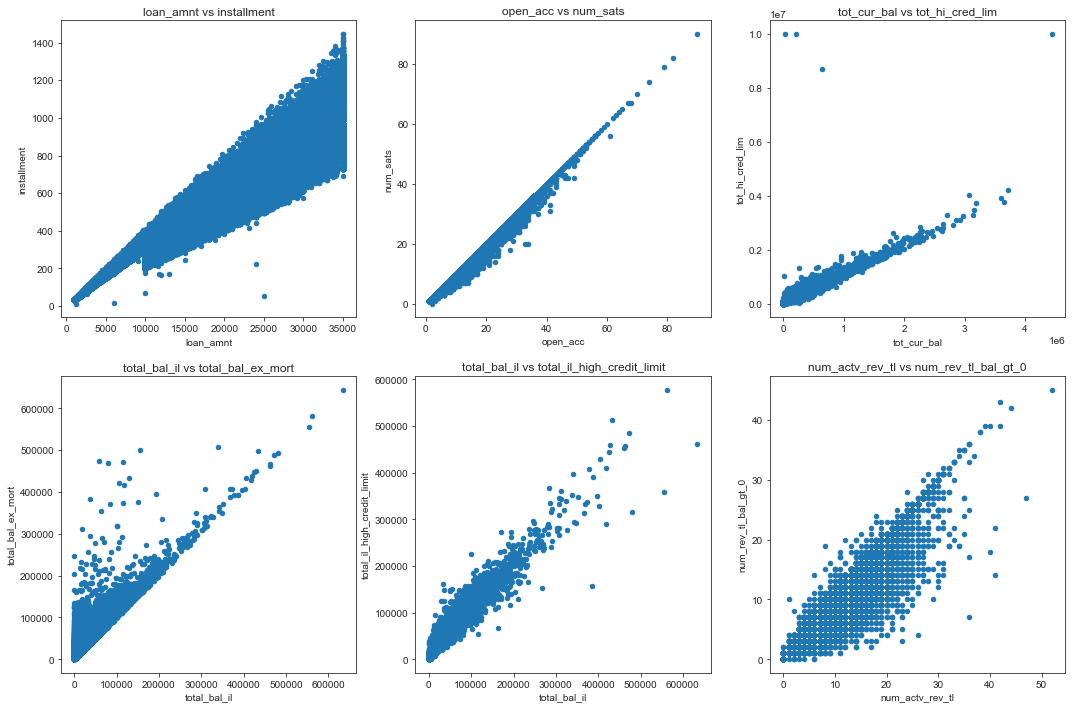

In [37]:
fig, axs = plt.subplots(2,3, figsize=(18,12))
filtered_loans_proc_df.plot(x='loan_amnt', y='installment', kind='scatter', ax=axs[0,0])
axs[0,0].set_title('loan_amnt vs installment')
filtered_loans_proc_df.plot(x='open_acc', y='num_sats', kind='scatter', ax=axs[0,1])
axs[0,1].set_title('open_acc vs num_sats')
filtered_loans_proc_df.plot(x='tot_cur_bal', y='tot_hi_cred_lim', kind='scatter', ax=axs[0,2])
axs[0,2].set_title('tot_cur_bal vs tot_hi_cred_lim')
filtered_loans_proc_df.plot(x='total_bal_il', y='total_bal_ex_mort', kind='scatter', ax=axs[1,0])
axs[1,0].set_title('total_bal_il vs total_bal_ex_mort')
filtered_loans_proc_df.plot(x='total_bal_il', y='total_il_high_credit_limit', kind='scatter', ax=axs[1,1])
axs[1,1].set_title('total_bal_il vs total_il_high_credit_limit')
filtered_loans_proc_df.plot(x='num_actv_rev_tl', y='num_rev_tl_bal_gt_0', kind='scatter', ax=axs[1,2])
axs[1,2].set_title('num_actv_rev_tl vs num_rev_tl_bal_gt_0')

The definition of installment is the monthly payment owed by the borrower if the loan originates, indicating that there can be a dependence of installment on the loan amount (though not exactly a one-to-one dependence). We also observe that open_acc (the number of open credit lines) and num_sats (number of satisfactory accounts) are strongly correlated. Minus some outliers, we see a trend between tot_cur_bal and tot_hi_cred_lim. 

We are a little hesitant to drop total_bal_ex_mort. 

Let us drop some redundant features that are strongly correlated to other features. These may impact the performance of machine learning models. Let us drop:
- installment
- num_sats
- tot_hi_cred_lim
- total_il_high_credit_limit
- num_rev_tl_bal_gt_0

We are a little hesitant to drop total_bal_ex_mort at the moment. While we can make out a trendline, we also notice a significant scatter of points away from the line that may provide signal about the applicants' mortage histories, which may prove to be indicative of their abilities to pay off loans.

In [38]:
filtered_loans_proc_df.drop(columns=['installment', 'num_sats', 'tot_hi_cred_lim',
                                    'total_il_high_credit_limit', 'num_rev_tl_bal_gt_0'], inplace=True)

cat_cols = [c for c in filtered_loans_proc_df if filtered_loans_proc_df[c].dtype=='object']

filtered_loans_proc_df[cat_cols].head()

,emp_title,home_ownership,verification_status,purpose,title,earliest_cr_line,initial_list_status,application_type
0,Senior Manager,MORTGAGE,Not Verified,debt_consolidation,Debt consolidation,May-1984,w,Individual
1,Salesman,RENT,Not Verified,credit_card,Credit card refinancing,May-2008,w,Individual
2,Aviation Safety Inspector,RENT,Source Verified,debt_consolidation,Debt consolidation,Nov-2000,w,Individual
3,general manager,RENT,Not Verified,credit_card,Credit card refinancing,Jan-2011,w,Individual
4,Sales Manager,MORTGAGE,Not Verified,debt_consolidation,Debt consolidation,Dec-2001,w,Individual


One of the categorical columns is the earliest month a credit line was opened by the applicant. Knowing that these are loan applications submitted in 2015, let us get the number of years from the date in "earliest_cr_line". We do note that the number of years may be slightly off considering the credit lines were opened over any of the months of the year.

In [39]:
filtered_loans_proc_df['earliest_cr_line'] = filtered_loans_proc_df['earliest_cr_line'].apply(lambda x: datetime.strptime(x.lower(), '%b-%Y') if isinstance(x, str) else None)
filtered_loans_proc_df['years_since_earliest_cr_line'] = 2015 - filtered_loans_proc_df['earliest_cr_line'].apply(lambda x: x.year)
filtered_loans_proc_df[['earliest_cr_line', 'years_since_earliest_cr_line']].head()

,earliest_cr_line,years_since_earliest_cr_line
0,1984-05-01,31
1,2008-05-01,7
2,2000-11-01,15
3,2011-01-01,4
4,2001-12-01,14


Another categorical feature we are interested in investigating is "emp_title", the occupation. We can expect a large number of categorical values for this features, but we are interested in seeing if we can try to coarse-grain this feature in any way. The motivation is that the job held by an applicant may impact their ability to pay off their loan, especially if their job does not have the highest job security. 

In [40]:
filtered_loans_proc_df['emp_title'].apply(lambda x: x.lower() if isinstance(x, str) else None).value_counts().head(20)

teacher               7640
manager               7167
owner                 4653
registered nurse      3420
supervisor            3253
driver                3172
sales                 3010
rn                    2730
office manager        2221
project manager       2155
general manager       2047
truck driver          1669
director              1634
engineer              1511
president             1509
sales manager         1342
operations manager    1238
vice president        1198
police officer        1174
accountant            1159
Name: emp_title, dtype: int64

For instance, we may expect people in sales to have relatively low job security versus engineers or managers, considering people in sales may be laid off depending on their sales performance. We can make a similar statement about drivers.

This is a preliminary treatment, but let us see if we can coarse-grain these occupations into some categories. These were empirically determined from looking at the values in "emp_title".

In [41]:
def group_careers(df):
    new_df = df.copy()
    new_df['emp_title'] = new_df['emp_title'].apply(lambda x: x.lower() if isinstance(x, str) else None)
    
    new_df.loc[new_df['emp_title'].apply(lambda x: ('manag' in x or 'supervisor' in x or 'leader' in x or x=='team lead' or 'ceo' in x or 'president' in x or 'director' in x or x in ['vp', 'coo', 'cfo']) if isinstance(x, str) else False), 'emp_title'] = 'leadership'
    new_df.loc[new_df['emp_title'].apply(lambda x: 'sales' in x or x == 'account executive' if isinstance(x, str) else False), 'emp_title'] = 'sales'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('nurse' in x or x in ['rn', 'lpn', 'cna', 'lvn']) if isinstance(x, str) else False), 'emp_title'] = 'nurse'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('engineer' in x or x =='tech' or 'software' in x or 'programmer' in x or 'web devel' in x) if isinstance(x, str) else False), 'emp_title'] = 'engineer'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('driver' in x or 'bus' in x) if isinstance(x, str) else False), 'emp_title'] = 'driver'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('receptionist' in x or 'secretary' in x or 'administrative assistant' in x or 'executive assistant' in x or x=='admin specialist' or 'clerk' in x) if isinstance(x, str) else False), 'emp_title'] = 'secretary'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('teacher' in x or 'principal' in x) if isinstance(x, str) else False), 'emp_title'] = 'school'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('technician' in x or 'maintenance' in x or x=='mail carrier' or 'mechanic' in x or 'operator' in x or 'machin' in x or 'laborer' in x or 'electrician' in x or 'foreman' in x or 'custodian' in x or 'welder' in x or 'warehouse' in x or 'carpenter' in x or 'plumber' in x) if isinstance(x, str) else False), 'emp_title'] = 'tradesman'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('legal' in x or 'attorney' in x) if isinstance(x, str) else False), 'emp_title'] = 'law'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('cashier' in x or 'customer service' in x or x=='csr') if isinstance(x, str) else False), 'emp_title'] = 'retail'
    new_df.loc[new_df['emp_title'].apply(lambda x: ('bartender' in x or 'cook' in x or 'chef' in x or x in ['waiter', 'waitress']) if isinstance(x, str) else False), 'emp_title'] = 'culinary'
    
    return new_df

In [42]:
processed_loans_df = group_careers(filtered_loans_proc_df)

processed_loans_df['emp_title'].head()

0                   leadership
1                        sales
2    aviation safety inspector
3                   leadership
4                   leadership
Name: emp_title, dtype: object

In [43]:
processed_loans_df['emp_title'].value_counts().head(12)

leadership    84005
tradesman     20769
engineer      11808
school        10716
driver        10479
nurse         10399
sales          9465
secretary      7140
owner          4653
law            3404
retail         2739
culinary       2128
Name: emp_title, dtype: int64

What would be good to try out is to see if there are relationships between these occupations and the likelihood of a borrower defaulting on their loan. If there is a relationship, it may point to job security or the nature of the job impacting their financial status.

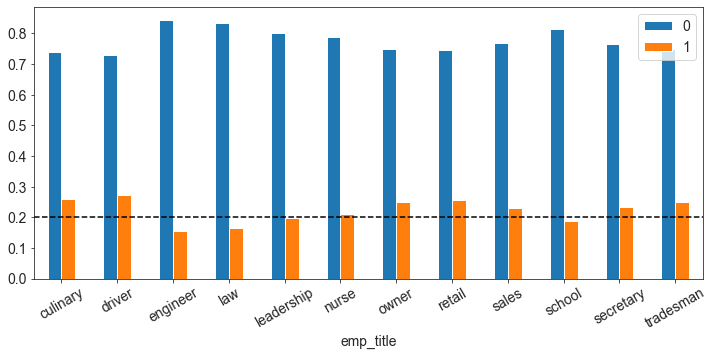

In [44]:
fig, ax = plt.subplots(figsize=(12,5))

processed_loans_df[processed_loans_df['emp_title'].apply(
    lambda x: x in ['leadership', 'tradesman', 'engineer', 'school', 'driver', 'nurse',
                   'sales', 'secretary', 'owner', 'law', 'retail', 'culinary'] 
    if isinstance(x, str) else False)].groupby(by='emp_title')['loan_status'].value_counts(normalize=True).unstack().plot.bar(ax=ax)
plt.axhline(0.2, ls='dashed', color='black')
plt.xticks(rotation=30, size=14)
plt.yticks(size=14)
plt.xlabel('emp_title', size=14)
plt.legend(prop={'size':14})

We note that for this group of occupations, over 20% of culinary workers, drivers, nurses, business owners, retail workers, secretaries, and tradesmen are likely to default on their loans based on the data. 

We may want to keep track of some of these "higher-risk occupations" if we are interested in using these categorical values as features for modeling. We plan to perform one-hot encoding of the categorical features, where we create encoded columns with specific categorical values from each feature (if a row does not have any of the specific categorical values from a categorical feature, the row will have all zeros for the encoded features). 

In [45]:
ohe_categories = [['tradesman', 'nurse', 'driver', 'sales', 'secretary', 'owner', 
                   'retail', 'culinary'],
                  ['MORTGAGE', 'RENT', 'OWN'], ['Verified', 'Source Verified'],
                 ['debt_consolidation', 'credit_card', 'home_improvement', 'major_purchase',
                 'medical', 'small_business', 'car', 'moving', 'vacation', 'house'],
                 ['w'], ['Individual']]

ohe_cat_cols = ['emp_title', 'home_ownership', 'verification_status', 'purpose', 
                'initial_list_status', 'application_type']

In [46]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories=ohe_categories, handle_unknown='ignore')
transformed_matrix = ohe.fit_transform(processed_loans_df[ohe_cat_cols])

From the OneHotEncoder, we have generated a numpy array of encoded columns derived from our categorical values of interest. We would like to create a DataFrame. We note that we can create column names from the OneHotEncoder object, but the prefixes have relatively little meaning.

In [47]:
ohe.get_feature_names()

array(['x0_tradesman', 'x0_nurse', 'x0_driver', 'x0_sales',
       'x0_secretary', 'x0_owner', 'x0_retail', 'x0_culinary',
       'x1_MORTGAGE', 'x1_RENT', 'x1_OWN', 'x2_Verified',
       'x2_Source Verified', 'x3_debt_consolidation', 'x3_credit_card',
       'x3_home_improvement', 'x3_major_purchase', 'x3_medical',
       'x3_small_business', 'x3_car', 'x3_moving', 'x3_vacation',
       'x3_house', 'x4_w', 'x5_Individual'], dtype=object)

Let us create prefixes that detail where the categorical values originally came from.

In [48]:
ohe_columns = list()

for i, j in zip(ohe.categories_, ohe_cat_cols):
    col_list = [j + '_' + c for c in i]
    ohe_columns.extend(col_list)

In [49]:
encoded_cat_df = pd.DataFrame(transformed_matrix.todense(), columns=ohe_columns)

encoded_cat_df.head(8)

,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Let us now concatenate this DataFrame of encoded columns onto our original DataFrame. We can, then, drop the original categorical features. 

In [50]:
combined_df = pd.concat((processed_loans_df, encoded_cat_df), axis=1)

combined_df.drop(columns=cat_cols, inplace=True)

print(combined_df.shape)
combined_df.head()

(333484, 93)


,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,years_since_earliest_cr_line,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual
0,28000.0,10.0,92000.0,0,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,64.5,24.0,0.0,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,74920.0,41500.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,12000.0,3.0,40000.0,0,31.95,3.0,0.0,9.0,NaN,16.0,0.0,11008.0,41.4,22.0,0.0,NaN,0.0,230.0,31915.0,0.0,2.0,1.0,1.0,12.0,20907.0,64.0,1.0,2.0,3058.0,54.0,26600.0,2.0,0.0,4.0,3.0,2128.0,10671.0,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,31915.0,21200.0,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,33600.0,8.0,104000.0,0,14.01,0.0,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,0.0,29.0,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,42952.0,33200.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,11550.0,5.0,38000.0,1,21.07,0.0,0.0,NaN,NaN,9.0,0.0,7179.0,39.7,12.0,0.0,NaN,0.0,0.0,10353.0,1.0,2.0,0.0,1.0,13.0,3174.0,20.0,2.0,3.0,2701.0,30.0,18100.0,4.0,1.0,2.0,4.0,1150.0,6924.0,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,10353.0,12300.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,25000.0,10.0,109000.0,0,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,54.3,19.0,0.0,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,68056.0,38400.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [51]:
def log_above_zero(x):
    if x > 0:
        return np.log(x)
    else:
        return 0

log_df = combined_df.copy()

num_log_cols = ['tot_cur_bal', 'avg_cur_bal', 'annual_inc', 'loan_amnt', 'revol_bal', 'total_bal_il',
               'max_bal_bc', 'total_rev_hi_lim', 'bc_open_to_buy', 'total_bal_ex_mort', 'total_bc_limit']

log_df[num_log_cols] = log_df[num_log_cols].applymap(log_above_zero)

log_df.head()

,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,years_since_earliest_cr_line,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual
0,10.239960,10.0,11.429544,0,21.60,0.0,0.0,42.0,NaN,16.0,0.0,10.849473,64.5,24.0,0.0,NaN,0.0,0.0,12.306416,0.0,2.0,0.0,0.0,27.0,10.061047,55.0,0.0,1.0,9.077038,61.0,11.288531,0.0,1.0,0.0,1.0,9.533800,9.718543,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,11.224176,10.633449,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,9.392662,3.0,10.596635,0,31.95,3.0,0.0,9.0,NaN,16.0,0.0,9.306378,41.4,22.0,0.0,NaN,0.0,230.0,10.370831,0.0,2.0,1.0,1.0,12.0,9.947839,64.0,1.0,2.0,8.025516,54.0,10.188666,2.0,0.0,4.0,3.0,7.662938,9.275285,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,10.370831,9.961756,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,10.422281,8.0,11.552146,0,14.01,0.0,2.0,29.0,NaN,14.0,0.0,10.256782,51.8,31.0,0.0,29.0,0.0,0.0,10.667838,0.0,1.0,0.0,0.0,50.0,9.580316,NaN,1.0,1.0,9.472089,52.0,10.915088,1.0,0.0,5.0,1.0,8.028781,9.024252,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,10.667838,10.410305,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,9.354441,5.0,10.545341,1,21.07,0.0,0.0,NaN,NaN,9.0,0.0,8.878915,39.7,12.0,0.0,NaN,0.0,0.0,9.245032,1.0,2.0,0.0,1.0,13.0,8.062748,20.0,2.0,3.0,7.901377,30.0,9.803667,4.0,1.0,2.0,4.0,7.047517,8.842749,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,9.245032,9.417355,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,10.126631,10.0,11.599103,0,26.02,0.0,1.0,NaN,NaN,9.0,0.0,9.945685,54.3,19.0,0.0,NaN,0.0,0.0,12.630624,0.0,3.0,0.0,1.0,13.0,10.762022,58.0,0.0,1.0,9.097955,57.0,10.555813,1.0,0.0,1.0,2.0,10.433410,9.772125,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,11.128086,10.555813,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [52]:
corr_log_mat = log_df.corr()
stacked_log_corr_df = corr_log_mat.stack().reset_index()
stacked_log_corr_df.columns = ['row', 'column', 'corr_value']
stacked_log_corr_df.head()

,row,column,corr_value
0,loan_amnt,loan_amnt,1.000000
1,loan_amnt,emp_length,0.078975
2,loan_amnt,annual_inc,0.485085
3,loan_amnt,loan_status,0.067178
4,loan_amnt,dti,0.011560


In [53]:
stacked_log_corr_df[(stacked_log_corr_df['row']!=stacked_log_corr_df['column']) &\
                   (stacked_log_corr_df['corr_value'].abs() > .9)]

,row,column,corr_value
1709,tot_cur_bal,avg_cur_bal,0.926039
2260,total_bal_il,max_bal_bc,0.925423
2628,max_bal_bc,total_bal_il,0.925423
3273,avg_cur_bal,tot_cur_bal,0.926039
3880,mo_sin_old_rev_tl_op,years_since_earliest_cr_line,0.918706
6272,years_since_earliest_cr_line,mo_sin_old_rev_tl_op,0.918706


"years_since_earliest_cr_line" was a feature we created. However, we realize that it is similar to mo_sin_old_rev_tl_op (months since the oldest bank installment account opened). We can drop this feature we created, especially considering our definition of year was not entirely correct to start with.

We notice a relationship between the total current balance and average current balance, which may be to be expected.

Text(0.5, 1.0, 'Logarithmic Values')

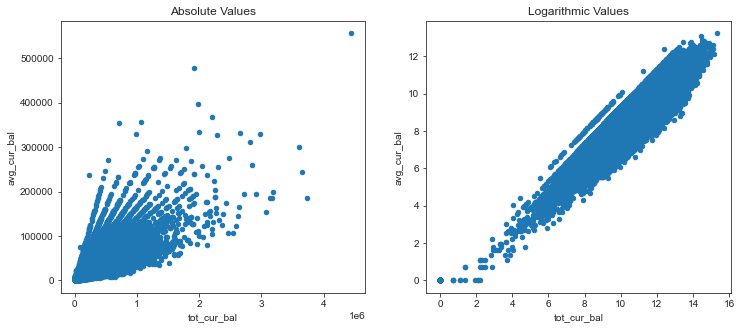

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

combined_df.plot(x='tot_cur_bal', y='avg_cur_bal', kind='scatter', ax=axs[0])
axs[0].set_title('Absolute Values')
log_df.plot(x='tot_cur_bal', y='avg_cur_bal', kind='scatter', ax=axs[1])
axs[1].set_title('Logarithmic Values')

Given the nature of the total current balance and average current balance, we should not be surprised that the logarithms of the two features are fairly correlated after al, even if there can be some scatter in their absolute values. Let us drop avg_cur_bal as well.

Text(0.5, 1.0, 'Logarithmic Values')

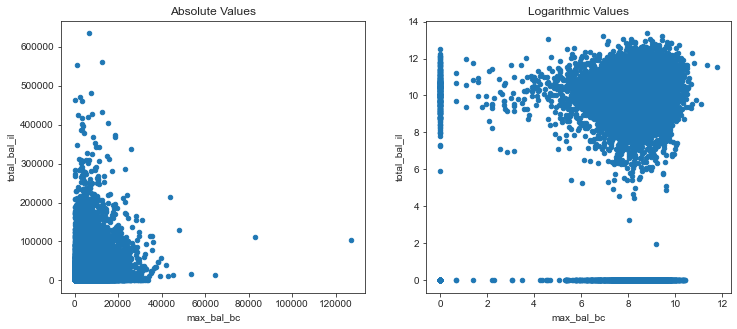

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

combined_df.plot(x='max_bal_bc', y='total_bal_il', kind='scatter', ax=axs[0])
axs[0].set_title('Absolute Values')
log_df.plot(x='max_bal_bc', y='total_bal_il', kind='scatter', ax=axs[1])
axs[1].set_title('Logarithmic Values')

While they pertain to balances on accounts, we do not see a strong relationship between these two variables when they are plotted. Let us keep these two variables.

In [56]:
final_df = log_df.drop(columns=['avg_cur_bal', 'years_since_earliest_cr_line'])
print(final_df.shape)
final_df.head()

(333484, 91)


,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual
0,10.239960,10.0,11.429544,0,21.60,0.0,0.0,42.0,NaN,16.0,0.0,10.849473,64.5,24.0,0.0,NaN,0.0,0.0,12.306416,0.0,2.0,0.0,0.0,27.0,10.061047,55.0,0.0,1.0,9.077038,61.0,11.288531,0.0,1.0,0.0,1.0,9.718543,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,11.224176,10.633449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,9.392662,3.0,10.596635,0,31.95,3.0,0.0,9.0,NaN,16.0,0.0,9.306378,41.4,22.0,0.0,NaN,0.0,230.0,10.370831,0.0,2.0,1.0,1.0,12.0,9.947839,64.0,1.0,2.0,8.025516,54.0,10.188666,2.0,0.0,4.0,3.0,9.275285,49.7,0.0,0.0,64.0,91.0,10.0,10.0,0.0,10.0,9.0,2.0,9.0,0.0,7.0,8.0,10.0,11.0,3.0,14.0,19.0,0.0,0.0,0.0,2.0,90.5,20.0,0.0,0.0,10.370831,9.961756,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,10.422281,8.0,11.552146,0,14.01,0.0,2.0,29.0,NaN,14.0,0.0,10.256782,51.8,31.0,0.0,29.0,0.0,0.0,10.667838,0.0,1.0,0.0,0.0,50.0,9.580316,NaN,1.0,1.0,9.472089,52.0,10.915088,1.0,0.0,5.0,1.0,9.024252,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,10.667838,10.410305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,9.354441,5.0,10.545341,1,21.07,0.0,0.0,NaN,NaN,9.0,0.0,8.878915,39.7,12.0,0.0,NaN,0.0,0.0,9.245032,1.0,2.0,0.0,1.0,13.0,8.062748,20.0,2.0,3.0,7.901377,30.0,9.803667,4.0,1.0,2.0,4.0,8.842749,43.7,0.0,0.0,39.0,59.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,3.0,4.0,5.0,5.0,2.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,9.245032,9.417355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,10.126631,10.0,11.599103,0,26.02,0.0,1.0,NaN,NaN,9.0,0.0,9.945685,54.3,19.0,0.0,NaN,0.0,0.0,12.630624,0.0,3.0,0.0,1.0,13.0,10.762022,58.0,0.0,1.0,9.097955,57.0,10.555813,1.0,0.0,1.0,2.0,9.772125,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,11.128086,10.555813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [57]:
final_df.dtypes.value_counts()

float64    90
int64       1
dtype: int64

# Modeling
We can begin the process of modeling, given our transformed dataset with numeric columns. Let us begin by splitting the dataset into train, validation, and test datasets.

In [58]:
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['loan_status'])
y = final_df['loan_status']

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=.1, random_state=42, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=.2, random_state=42, stratify=y_data)

(X_train.shape, X_valid.shape, X_test.shape)

((240108, 90), (60027, 90), (33349, 90))

In [59]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

We performed stratified splits on the datasets based on the balance of the target variable. We have an imbalanced dataset, where a majority of the loans have been paid off. It would be useful to train models on a training dataset with a similar distribution of target values as in the full dataset.

In [60]:
split_df = pd.concat((pd.Series(y_train).value_counts(normalize=True),
                      pd.Series(y_valid).value_counts(normalize=True),
                      pd.Series(y_test).value_counts(normalize=True)), axis=1)
split_df.columns = ['train', 'valid', 'test']
split_df

,train,valid,test
0,0.785938,0.785946,0.785931
1,0.214062,0.214054,0.214069


Let us observe what columns are sparse, or have a high density of missing values, in the training set.

In [61]:
(X_train.isnull().sum() / len(X_train)).sort_values(ascending=False).head(20)

il_util                           0.964962
mths_since_rcnt_il                0.961047
all_util                          0.960072
inq_fi                            0.960072
total_cu_tl                       0.960072
open_rv_24m                       0.960072
open_rv_12m                       0.960072
open_il_24m                       0.960072
open_il_12m                       0.960072
open_act_il                       0.960072
open_acc_6m                       0.960072
inq_last_12m                      0.960072
mths_since_last_record            0.814259
mths_since_recent_bc_dlq          0.740204
mths_since_last_major_derog       0.702426
mths_since_recent_revol_delinq    0.638509
mths_since_last_delinq            0.483020
mths_since_recent_inq             0.099972
emp_length                        0.057666
num_tl_120dpd_2m                  0.046246
dtype: float64

In [62]:
drop_sparse_cols = [c for c in X_train.columns if X_train[c].isnull().sum() / len(X_train) > .8]
drop_sparse_cols

['mths_since_last_record',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

It may serve our best interests to drop these columns. We could try to impute these columns, but the imputation would be done with a small sample of data for these sparse columns, so these columns may not be particularly useful for modeling.

In [63]:
X_train.drop(columns=drop_sparse_cols, inplace=True)
print(X_train.shape)
X_train.head()

(240108, 77)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual
0,9.615805,0.0,11.156251,13.46,4.0,1.0,3.0,11.0,0.0,9.282847,32.5,18.0,0.0,22.0,0.0,0.0,10.109159,0.0,0.0,10.407289,5.0,9.540938,41.3,0.0,0.0,92.0,317.0,1.0,1.0,0.0,1.0,13.0,6.0,3.0,1.0,3.0,6.0,4.0,8.0,3.0,10.0,14.0,0.0,0.0,1.0,3.0,77.8,25.0,0.0,0.0,10.109159,10.073230,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.294050,4.0,10.915088,22.56,0.0,0.0,NaN,20.0,0.0,9.539572,17.9,48.0,0.0,NaN,0.0,0.0,11.964975,0.0,0.0,11.261897,7.0,10.651194,24.4,0.0,0.0,154.0,179.0,15.0,8.0,3.0,15.0,NaN,19.0,NaN,0.0,3.0,5.0,9.0,16.0,15.0,16.0,30.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,10.790370,10.931320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,7.313220,10.0,11.643954,26.46,0.0,2.0,NaN,13.0,0.0,9.584934,90.9,26.0,0.0,NaN,0.0,0.0,12.304591,0.0,0.0,9.680344,6.0,5.159055,98.1,0.0,0.0,306.0,168.0,5.0,5.0,7.0,41.0,NaN,1.0,NaN,0.0,4.0,7.0,4.0,4.0,12.0,7.0,7.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,10.900012,9.104980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,9.169518,10.0,11.213373,24.50,0.0,1.0,70.0,11.0,1.0,9.145802,59.7,36.0,0.0,70.0,0.0,0.0,12.727779,0.0,0.0,9.661416,8.0,8.271037,67.4,0.0,0.0,129.0,233.0,4.0,4.0,3.0,4.0,70.0,3.0,70.0,2.0,3.0,4.0,3.0,17.0,9.0,6.0,24.0,0.0,0.0,0.0,6.0,92.9,0.0,1.0,0.0,11.049588,9.392662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.978131,10.0,10.799576,32.18,0.0,2.0,NaN,16.0,0.0,9.806205,59.7,31.0,0.0,NaN,0.0,0.0,11.236473,0.0,0.0,10.322198,5.0,6.826545,94.8,0.0,0.0,157.0,183.0,3.0,3.0,1.0,29.0,NaN,3.0,NaN,0.0,2.0,4.0,3.0,11.0,5.0,11.0,25.0,0.0,0.0,0.0,4.0,100.0,66.7,0.0,0.0,10.535530,9.786954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We will, then, impute the remaining sparse columns. For simplicity, let us impute the missing values in each column with the average of the values. We are calculating the average with the training set, as we do not wish to bias any sort of imputer with information from the validation and test sets. What we will do is train an imputer on the training set, and use that same imputer to impute the validation and test sets (i.e. impute with averages from the training set). We will also generate new columns indicating if values were missing in the corresponding sparse columns to indicate that imputation was performed for a given row.

In [64]:
from sklearn.impute import SimpleImputer

cols_with_miss_val = [c for c in X_train if X_train[c].isnull().sum() > 0]

imputer = SimpleImputer(add_indicator=True)
imputed_array = imputer.fit_transform(X_train[cols_with_miss_val])
imputed_df = pd.DataFrame(imputed_array, columns=cols_with_miss_val + [c + '_missing' for c in cols_with_miss_val])

In [65]:
X_train_imp = pd.concat((X_train.drop(columns=cols_with_miss_val), imputed_df), axis=1)
X_train_imp.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual,emp_length,mths_since_last_delinq,revol_util,mths_since_last_major_derog,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_rev_accts,num_tl_120dpd_2m,percent_bc_gt_75,emp_length_missing,mths_since_last_delinq_missing,revol_util_missing,mths_since_last_major_derog_missing,bc_util_missing,mo_sin_old_il_acct_missing,mths_since_recent_bc_missing,mths_since_recent_bc_dlq_missing,mths_since_recent_inq_missing,mths_since_recent_revol_delinq_missing,num_rev_accts_missing,num_tl_120dpd_2m_missing,percent_bc_gt_75_missing
0,9.615805,11.156251,13.46,4.0,1.0,11.0,0.0,9.282847,18.0,0.0,0.0,0.0,10.109159,0.0,0.0,10.407289,5.0,9.540938,0.0,0.0,317.0,1.0,1.0,0.0,1.0,3.0,6.0,4.0,8.0,3.0,10.0,0.0,1.0,3.0,77.8,0.0,0.0,10.109159,10.073230,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.000000,32.5,22.000000,41.3,92.0,1.0,13.00000,6.0,3.000000,14.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.294050,10.915088,22.56,0.0,0.0,20.0,0.0,9.539572,48.0,0.0,0.0,0.0,11.964975,0.0,0.0,11.261897,7.0,10.651194,0.0,0.0,179.0,15.0,8.0,3.0,0.0,3.0,5.0,9.0,16.0,15.0,16.0,0.0,0.0,2.0,100.0,0.0,0.0,10.790370,10.931320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,34.310809,17.9,43.927768,24.4,154.0,15.0,40.22708,19.0,36.160766,30.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,7.313220,11.643954,26.46,0.0,2.0,13.0,0.0,9.584934,26.0,0.0,0.0,0.0,12.304591,0.0,0.0,9.680344,6.0,5.159055,0.0,0.0,168.0,5.0,5.0,7.0,0.0,4.0,7.0,4.0,4.0,12.0,7.0,0.0,0.0,3.0,100.0,0.0,0.0,10.900012,9.104980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,34.310809,90.9,43.927768,98.1,306.0,41.0,40.22708,1.0,36.160766,7.0,0.0,100.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,9.169518,11.213373,24.50,0.0,1.0,11.0,1.0,9.145802,36.0,0.0,0.0,0.0,12.727779,0.0,0.0,9.661416,8.0,8.271037,0.0,0.0,233.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,17.0,9.0,6.0,0.0,0.0,6.0,92.9,1.0,0.0,11.049588,9.392662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,70.000000,59.7,70.000000,67.4,129.0,4.0,70.00000,3.0,70.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.978131,10.799576,32.18,0.0,2.0,16.0,0.0,9.806205,31.0,0.0,0.0,0.0,11.236473,0.0,0.0,10.322198,5.0,6.826545,0.0,0.0,183.0,3.0,3.0,1.0,0.0,2.0,4.0,3.0,11.0,5.0,11.0,0.0,0.0,4.0,100.0,0.0,0.0,10.535530,9.786954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,34.310809,59.7,43.927768,94.8,157.0,29.0,40.22708,3.0,36.160766,25.0,0.0,66.7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Let us perform the same preprocessing on the validation and test sets.

In [66]:
X_valid.drop(columns=drop_sparse_cols, inplace=True)

valid_imputed_array = imputer.transform(X_valid[cols_with_miss_val])
valid_imputed_df = pd.DataFrame(valid_imputed_array, columns=cols_with_miss_val + [c + '_missing' for c in cols_with_miss_val])
X_valid_imp = pd.concat((X_valid.drop(columns=cols_with_miss_val), valid_imputed_df), axis=1)
X_valid_imp.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual,emp_length,mths_since_last_delinq,revol_util,mths_since_last_major_derog,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_rev_accts,num_tl_120dpd_2m,percent_bc_gt_75,emp_length_missing,mths_since_last_delinq_missing,revol_util_missing,mths_since_last_major_derog_missing,bc_util_missing,mo_sin_old_il_acct_missing,mths_since_recent_bc_missing,mths_since_recent_bc_dlq_missing,mths_since_recent_inq_missing,mths_since_recent_revol_delinq_missing,num_rev_accts_missing,num_tl_120dpd_2m_missing,percent_bc_gt_75_missing
0,9.090994,10.463103,21.36,0.0,0.0,9.0,0.0,8.012681,11.0,0.0,0.0,0.0,10.149253,0.0,0.0,9.588777,9.0,8.675393,0.0,0.0,151.0,1.0,1.0,0.0,0.0,4.0,6.0,4.0,4.0,3.0,7.0,0.0,0.0,6.0,100.0,0.0,0.0,10.149253,8.999619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,34.310809,20.7,43.927768,27.7,138.0,1.0,40.22708,4.0,36.160766,8.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,9.510445,10.933107,17.47,0.0,0.0,10.0,0.0,9.223454,13.0,0.0,0.0,0.0,12.580398,0.0,0.0,9.358760,6.0,5.545177,0.0,0.0,166.0,16.0,16.0,1.0,0.0,3.0,6.0,3.0,5.0,3.0,7.0,0.0,0.0,0.0,100.0,0.0,0.0,10.019714,8.974618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,34.310809,87.3,43.927768,96.8,136.0,16.0,40.22708,1.0,36.160766,9.0,0.0,100.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,9.392662,10.404263,18.25,0.0,0.0,12.0,3.0,9.359880,13.0,0.0,0.0,0.0,9.796682,0.0,0.0,9.686575,6.0,7.469084,0.0,0.0,44.0,7.0,7.0,0.0,0.0,4.0,7.0,4.0,4.0,5.0,8.0,0.0,0.0,1.0,92.3,3.0,0.0,9.796682,8.999619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,80.000000,72.1,43.927768,78.4,141.0,7.0,40.22708,7.0,36.160766,8.0,0.0,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,10.085809,11.184421,25.27,1.0,1.0,15.0,1.0,9.906682,20.0,0.0,0.0,0.0,11.727529,0.0,0.0,10.947292,4.0,9.958496,0.0,0.0,265.0,2.0,2.0,3.0,0.0,5.0,9.0,6.0,8.0,2.0,12.0,0.0,0.0,1.0,95.0,1.0,0.0,9.977203,10.454495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.000000,35.3,43.927768,39.1,73.0,2.0,40.22708,2.0,36.160766,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9.740969,10.714418,24.00,0.0,1.0,12.0,0.0,9.656883,30.0,0.0,0.0,0.0,10.749485,0.0,0.0,9.908475,4.0,5.826000,0.0,0.0,155.0,12.0,12.0,2.0,1.0,3.0,4.0,3.0,3.0,17.0,7.0,0.0,0.0,1.0,96.4,0.0,0.0,10.749485,9.574983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,35.000000,77.8,35.000000,97.6,183.0,14.0,40.22708,3.0,36.160766,9.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [67]:
X_test.drop(columns=drop_sparse_cols, inplace=True)

test_imputed_array = imputer.transform(X_test[cols_with_miss_val])
test_imputed_df = pd.DataFrame(test_imputed_array, columns=cols_with_miss_val + [c + '_missing' for c in cols_with_miss_val])
X_test_imp = pd.concat((X_test.drop(columns=cols_with_miss_val), test_imputed_df), axis=1)
X_test_imp.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,emp_title_tradesman,emp_title_nurse,emp_title_driver,emp_title_sales,emp_title_secretary,emp_title_owner,emp_title_retail,emp_title_culinary,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN,verification_status_Verified,verification_status_Source Verified,purpose_debt_consolidation,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,purpose_car,purpose_moving,purpose_vacation,purpose_house,initial_list_status_w,application_type_Individual,emp_length,mths_since_last_delinq,revol_util,mths_since_last_major_derog,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_rev_accts,num_tl_120dpd_2m,percent_bc_gt_75,emp_length_missing,mths_since_last_delinq_missing,revol_util_missing,mths_since_last_major_derog_missing,bc_util_missing,mo_sin_old_il_acct_missing,mths_since_recent_bc_missing,mths_since_recent_bc_dlq_missing,mths_since_recent_inq_missing,mths_since_recent_revol_delinq_missing,num_rev_accts_missing,num_tl_120dpd_2m_missing,percent_bc_gt_75_missing
0,8.699515,11.097410,12.85,3.0,1.0,11.0,0.0,7.699389,21.0,0.0,0.0,0.0,10.951350,0.0,0.0,7.824046,1.0,0.000000,0.0,0.0,110.0,23.0,23.0,0.0,0.0,0.0,2.0,0.0,1.0,16.0,2.0,0.0,0.0,0.0,70.0,0.0,0.0,10.951350,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.000000,88.3,43.927768,61.261329,118.0,23.929592,40.22708,1.0,2.000000,4.0,0.0,46.475199,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,10.308953,11.289782,17.88,0.0,1.0,20.0,0.0,10.184598,44.0,0.0,0.0,1179.0,12.046579,0.0,0.0,10.328755,6.0,7.903966,0.0,0.0,144.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,8.0,32.0,6.0,0.0,0.0,3.0,100.0,0.0,0.0,12.046579,10.281924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,34.310809,86.6,43.927768,90.700000,173.0,5.000000,40.22708,5.0,36.160766,12.0,0.0,100.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,7.090077,10.968198,10.08,0.0,0.0,7.0,1.0,8.955448,20.0,0.0,0.0,0.0,12.753969,0.0,0.0,9.277999,5.0,4.477337,0.0,0.0,237.0,12.0,6.0,1.0,0.0,2.0,5.0,2.0,6.0,4.0,5.0,0.0,0.0,2.0,100.0,1.0,0.0,9.192380,8.575462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,34.310809,72.4,43.927768,98.300000,133.0,12.000000,40.22708,7.0,36.160766,14.0,0.0,100.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,10.188666,11.156251,22.37,0.0,0.0,10.0,0.0,9.554426,29.0,0.0,0.0,0.0,10.982220,0.0,0.0,10.043249,5.0,8.729397,0.0,0.0,217.0,11.0,11.0,0.0,0.0,3.0,4.0,4.0,15.0,9.0,8.0,0.0,0.0,1.0,100.0,0.0,0.0,10.982220,9.913438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,34.310809,61.3,43.927768,69.400000,95.0,11.000000,40.22708,17.0,36.160766,20.0,0.0,50.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9.903488,11.608236,5.50,0.0,1.0,15.0,0.0,10.218262,29.0,0.0,0.0,0.0,13.298801,0.0,0.0,11.798104,3.0,11.557908,0.0,0.0,380.0,2.0,2.0,5.0,0.0,5.0,5.0,10.0,14.0,2.0,12.0,0.0,0.0,1.0,100.0,0.0,0.0,10.226947,11.790557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,34.310809,20.6,43.927768,20.800000,129.0,2.000000,40.22708,1.0,36.160766,21.0,0.0,10.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Logistic Regression
For comparison, let us train a baseline logistic regression model on the training data and see how well it models the loan underwriting process. The model works best if the relationship between the data and the target variable is linear. 

By default, the LogisticRegression function employs L2 regularization, which can help combat overfitting. Given how the regularization is being performed, it would be prudent to scale the data before fitting the model. We are also setting the hyperparamter "class_weight" to "balanced" so that the misclassification of the minority class (defaulted loans) is treated to be costlier than the misclassification of the majority class during training.

In [68]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

lr_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('lr', LogisticRegression(class_weight='balanced', max_iter=200))])

lr_pipeline.fit(X_train_imp, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=200))])

Validation metrics:
Accuracy: 0.6336648508171323
[[29627 17551]
 [ 4439  8410]]
f1-score: 0.43339345529502704
Recall: 0.6545256440189898
Validation AUCPR: 0.3780094424040483


(0.0, 1.0)

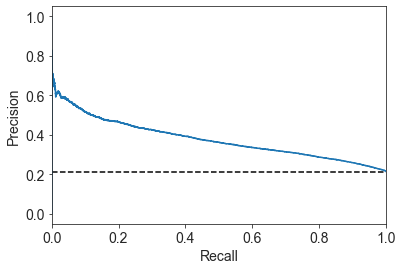

In [69]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, auc, f1_score, recall_score

y_valid_pred = lr_pipeline.predict(X_valid_imp)
y_valid_proba = lr_pipeline.predict_proba(X_valid_imp)

print('Validation metrics:')
print('Accuracy:', accuracy_score(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))
print('f1-score:', f1_score(y_valid, y_valid_pred))
print('Recall:', recall_score(y_valid, y_valid_pred))

precision, recall, threshold = precision_recall_curve(y_valid, y_valid_proba[:,1])

aucpr = auc(recall, precision)

print('Validation AUCPR:', aucpr)

fig, ax = plt.subplots(figsize=(6,4))
plt.axhline(y_valid.value_counts(normalize=True).loc[1], color='black', ls='dashed')
plt.plot(recall, precision)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim([0, 1])

With the hyperparameter "class_weight" set to "balanced", we have a classifier with a recall of 65% for the class 1, or "defaulted loans". This means for every defaulted loan, this classifier will detect 65% of them. This is not bad, and the classifier seems to be performing better than a junk classifier set to predict that _any random loan_ would default ~21% of the time (21% being the fraction of loans that were defaulted in our dataset). But let us see what would happen if we increase the misclassification cost on defaulting loans.

In [70]:
lr_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('lr', LogisticRegression(class_weight={1: 8, 0: 1}, max_iter=200))])

lr_pipeline.fit(X_train_imp, y_train)
y_valid_pred = lr_pipeline.predict(X_valid_imp)
y_valid_proba = lr_pipeline.predict_proba(X_valid_imp)

print('Validation metrics:')
print('Accuracy:', accuracy_score(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))
print('f1-score:', f1_score(y_valid, y_valid_pred))
print('Recall:', recall_score(y_valid, y_valid_pred))

precision, recall, threshold = precision_recall_curve(y_valid, y_valid_proba[:,1])

aucpr = auc(recall, precision)

print('Validation AUCPR:', aucpr)

Validation metrics:
Accuracy: 0.3939560531094341
[[11784 35394]
 [  985 11864]]
f1-score: 0.394762673232735
Recall: 0.9233403377694762
Validation AUCPR: 0.3769990588662866


We have a recall of 92%, which means this classifier does an impressive job at catching applications for loans that are likely to default. But we note that the classifier predicts, in the validation set, 11784 true negatives (paid off loans predicted correctly) and 35394 false positives (paid off loans predicted as defaulted loans). If investors follow this classifier, 79% of the loan applications will be predicted to be defaulted loans, which may be conservative and safe. However, there is a possibility that this could impact business.

Let's say this classifier is used to generate the proposed interest rates, and given how this classifier tends to predict many more defaulted loans, someone who would have likely paid off their loan would be given an interest rate far higher than they had expected and wanted. If they agree to go ahead with the loan, that would be profitable to the Lending Club. But that is assuming the applicant goes ahead. There is a chance that they may be turned off by the high interest rate, meaning there is a risk of losing business due to the aggressive predictions made by the classifier.

Here, 27% of the applicants would be given relatively low interest rates, based on the classifier's predictions (now, of this 21%, 8% would end up defaulting their loans). This isn't _terrible_, but let's say the Lending Club gave a minimum requirement asking of bumping up the percentage of applicants given lower interest rates up to above 30%. This means we'd only have to tweak the class weight by a little bit, to be less aggressive in the misclassification cost of defaulted loans. 

Validation metrics:
Accuracy: 0.46614023689339795
[[16792 30386]
 [ 1660 11189]]
f1-score: 0.4111788916654417
Recall: 0.8708070666977975
Validation AUCPR: 0.37729586021526595


(0.0, 1.0)

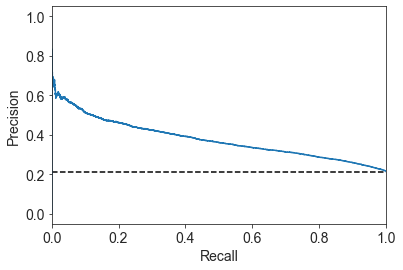

In [87]:
lr_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('lr', LogisticRegression(class_weight={1: 6.3, 0: 1}, max_iter=200))])

lr_pipeline.fit(X_train_imp, y_train)
y_valid_pred = lr_pipeline.predict(X_valid_imp)
y_valid_proba = lr_pipeline.predict_proba(X_valid_imp)

print('Validation metrics:')
print('Accuracy:', accuracy_score(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))
print('f1-score:', f1_score(y_valid, y_valid_pred))
print('Recall:', recall_score(y_valid, y_valid_pred))

precision_lr, recall_lr, threshold = precision_recall_curve(y_valid, y_valid_proba[:,1])

aucpr = auc(recall_lr, precision_lr)

print('Validation AUCPR:', aucpr)

fig, ax = plt.subplots(figsize=(6,4))
plt.axhline(y_valid.value_counts(normalize=True).loc[1], color='black', ls='dashed')
plt.plot(recall_lr, precision_lr)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim([0, 1])

The recall for defaulted loans is lowered to 87%, but we also note that about 31% of the loan applications receive lower interest rates. 

Let us see how this classifier performs on the held out test dataset, which had not been examined by the classifier before.

In [81]:
y_test_pred = lr_pipeline.predict(X_test_imp)
y_test_proba = lr_pipeline.predict_proba(X_test_imp)

print('Test metrics:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print('f1-score:', f1_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))

precision, recall, threshold = precision_recall_curve(y_test, y_test_proba[:,1])

aucpr = auc(recall, precision)

print('Test AUCPR:', aucpr)

Test metrics:
Accuracy: 0.4685897628114786
[[ 9424 16786]
 [  936  6203]]
f1-score: 0.41177642060541686
Recall: 0.8688892001680908
Test AUCPR: 0.3801115029793475


We see that the metrics between the validation and test set are consistent with each other.

Let us see what the most important features were to the logistic regression model by examining the magnitudes of the coefficients.

In [82]:
coef_df = pd.concat((pd.Series(X_train_imp.columns), pd.Series(lr_pipeline['lr'].coef_[0])), axis=1)
coef_df.columns = ['feature', 'coefficient']
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

coef_df.sort_values(by='abs_coefficient', ascending=False)

,feature,coefficient,abs_coefficient
0,loan_amnt,0.465057,0.465057
2,dti,0.229559,0.229559
16,acc_open_past_24mths,0.210392,0.210392
53,purpose_credit_card,-0.207763,0.207763
1,annual_inc,-0.204609,0.204609
38,total_bc_limit,-0.191364,0.191364
66,revol_util,0.160739,0.160739
52,purpose_debt_consolidation,-0.140913,0.140913
76,percent_bc_gt_75,0.140191,0.140191
8,total_acc,-0.130753,0.130753


Three of the features that had the greatest contributions to the classifier's predictions, as indicated by the coefficient magnitudes, were loan amount, the ratio of the borrower's total monthly debt payments on the total debt obligations (dti), and the number of trades opened in the past 24 months (acc_open_past_24mths). From the sign of the coefficients, the higher these numbers, the more likely a borrower is likely to default. 

Other insights we can get are how a higher bankcard high credit/credit limit (total_bc_limit) and/or higher annual income may indicate a borrower is likely to pay off their loan. Borrowers who are using their loan to pay off credit cards or for debt consolidation also seem likely to pay off their loans, according to the classifier. We notice, however, that if a borrower is using their loan to pay off a small business, they may be likely to default. We also note that if the borrower is a business owner, they are likely to default, which makes sense considering these two features would likely describe the same person. Perhaps a business owner is taking out a loan for their small business because their business is starting to go under, unfortunately. 

## Random Forest
Let us see if we can train a random forest on the data to model the loan status. We wish to see if the more complex random forest model can capture nonlinear relationships between the data and target variable that the logistic regression model may not have been able to model. We use a random forest instead of a single decision tree to minimize overfitting. 

Let us keep the same class weights that we determined from logistic regression. There are some  hyperparameters to tune, including the number of trees (n_estimators), maximum depth of the trees, and min_samples_leaf (the minimum number of samples required for a node to be considered a leaf node, where a branch terminates in a decision tree). We will employ grid search cross validation with five folds, scoring against the average precision, the weighted average of precisions at multiple thresholds in a precision-recall curve. Conceptually, this metric is similar to the area under the precision recall curve (AUCPR), which is a metric we are considering to evaluate the model's performance.

We note that we empirically modified the class weight.

In [91]:
rf = RandomForestClassifier(class_weight={1:6.5, 0:1}, random_state=42)

rf_param_grid = {'n_estimators': [100, 200],
                 'max_depth': [10, 15, 18],
                 'min_samples_leaf': [10, 50]}

rf_cv = GridSearchCV(rf, rf_param_grid, scoring='average_precision')

rf_cv.fit(X_train_imp, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1, 1: 6.3},
                                              random_state=42),
             param_grid={'max_depth': [10, 15, 18],
                         'min_samples_leaf': [10, 50],
                         'n_estimators': [100, 200]},
             scoring='average_precision')

Let us retrieve the random forest model with the hyperparameters that yielded the best average precision. We can also see what the optimized hyperparameters were. We will then use this model to make predictions on the validation set.

In [92]:
best_rf = rf_cv.best_estimator_
print(rf_cv.best_params_)

{'max_depth': 18, 'min_samples_leaf': 50, 'n_estimators': 200}


Validation Accuracy: 0.46582371266263517
[[16804 30374]
 [ 1691 11158]]
f1-score: 0.41036391386697557
Recall: 0.868394427581913
Validation AUCPR: 0.3772705202743097


(0.0, 1.0)

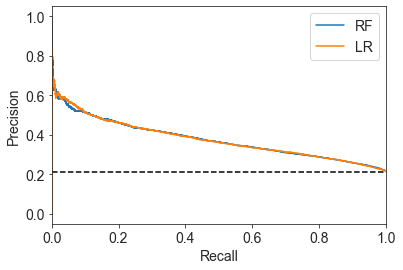

In [99]:
y_valid_pred_rf = best_rf.predict(X_valid_imp)
y_valid_proba_rf = best_rf.predict_proba(X_valid_imp)

print('Validation Accuracy:', accuracy_score(y_valid, y_valid_pred_rf))
print(confusion_matrix(y_valid, y_valid_pred_rf))
print('f1-score:', f1_score(y_valid, y_valid_pred_rf))
print('Recall:', recall_score(y_valid, y_valid_pred_rf))

precision_rf, recall_rf, threshold = precision_recall_curve(y_valid, y_valid_proba_rf[:,1])

aucpr = auc(recall_rf, precision_rf)

print('Validation AUCPR:', aucpr)

fig, ax = plt.subplots(figsize=(6,4))
plt.axhline(y_valid.value_counts(normalize=True).loc[1], color='black', ls='dashed')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_lr, precision_lr, color='C1', label='LR')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend(prop={'size': 14})
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim([0, 1])

We observe for this random forest, more than 30% of the loan applications are predicted to be paid off, meaning investors who would use the classifier would give more than 30% of these applications lower interest rates. Given this similar rate, we note that the recall for defaulted loans is slightly lower than from the logistic regression model, though not by much. Arguments can be made for keeping the logistic regression model for the benefit of simplicity and speed. 

Let us apply this random forest on the held out test dataset.

In [102]:
y_test_pred_rf = best_rf.predict(X_test_imp)
y_test_proba_rf = best_rf.predict_proba(X_test_imp)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred_rf))
print(confusion_matrix(y_test, y_test_pred_rf))
print('f1-score:', f1_score(y_test, y_test_pred_rf))
print('Recall:', recall_score(y_test, y_test_pred_rf))

precision, recall, threshold = precision_recall_curve(y_test, y_test_proba_rf[:,1])

aucpr = auc(recall, precision)

print('Test AUCPR:', aucpr)

Test Accuracy: 0.46688056613391704
[[ 9344 16866]
 [  913  6226]]
f1-score: 0.4118950745923059
Recall: 0.8721109399075501
Test AUCPR: 0.3757377877838415


And finally, let us see what the most improtant features were from the random forest. The feature importances are averaged over the nodes of the trees, quantifying the impurity changes when data points were split on each feature. We note that for this random forest, the feature importances average the Gini impurity changes.

In [103]:
rf_feat_df = pd.concat((pd.Series(X_train_imp.columns), pd.Series(best_rf.feature_importances_)), axis=1)
rf_feat_df.columns = ['feature', 'feature_importance']
rf_feat_df.sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
0,loan_amnt,7.924220e-02
2,dti,7.796854e-02
17,bc_open_to_buy,5.718603e-02
16,acc_open_past_24mths,5.396265e-02
12,tot_cur_bal,4.358865e-02
38,total_bc_limit,4.038020e-02
1,annual_inc,3.861234e-02
15,total_rev_hi_lim,3.584481e-02
68,bc_util,3.235488e-02
66,revol_util,3.121796e-02


Five of the most prevalent features in the random forest include the loan amount, the dti, bc_open_to_buy (total open to buy on revolving bank cards), number of trades opened in the past 24 months, and the total current balance. There are some features with zero importance, signifying they may not have been split on in the decision trees. These features include application_type_Individual, purpose_house, revol_util_missing, num_tl_30dpd, delinq_amnt, num_rev_accts_missing, and acc_now_delinq.

## Gradient Boosting
Let us apply gradient boosted decision trees as implemented in the XGBoost model. This model is an ensemble of weak learners (shallow decision trees) that iteratively train on the data (and errors in the previous decision trees). 

The process of hyperparameter tuning is a bit more complex owing to how the gradient boosted decision trees involve many more hyperparameters, including learning rates for when subsequent trees train on the errors of the past trees in a gradient descent-like fashion. For the sake of demonstration for this project, we will employ a randomized search cross validation, where we perform 5-fold cross validation on a randomized sample of 100 sets of hyperparameters. We note that there is a possibility we are not likely to find the global optimum as we are sampling about 18% of the hyperparameter sample space. Doing a brute-force grid search cross validation approach would yield better results at the expense of time. We may also consider alternate techniques like Bayesian optimization.

We note that the xgboost model is able to handle input features with missing values. During training, when a split is determined in a decision tree node, the algorithm determines a "default direction". If the data points with missing values for the split feature goes along the "default direction", the cost is more likely to be optimized than if these data points go along the other branch. We will, then, use the processed DataFrames for the train/validation/test sets before imputation was applied for each.

We note that we changed the class weights a little bit. This was done empirically. 

In [104]:
import xgboost

xgb_params = {
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [10, 50],
    'eta': [.1, .05, .01],
    'subsample': [.5, 0.8, 1],
    'colsample_bytree': [0.2, 0.4, .6],
    'max_depth': [4, 5, 6, 7, 8]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb = xgboost.XGBClassifier(scale_pos_weight=6.9, eval_metric='aucpr', 
                            n_estimators=200)
random_cv = RandomizedSearchCV(xgb, xgb_params, random_state=42, n_iter=100, scoring='average_precision')
search = random_cv.fit(X_train, y_train)

In [106]:
search.best_params_

{'subsample': 0.8,
 'min_child_weight': 50,
 'max_depth': 5,
 'learning_rate': 0.1,
 'eta': 0.05,
 'colsample_bytree': 0.6}

Validation Accuracy: 0.4653239375614307
[[16613 30565]
 [ 1530 11319]]
f1-score: 0.4136078782452999
Recall: 0.8809245855708615
Validation AUCPR: 0.39688254874626117


(0.0, 1.0)

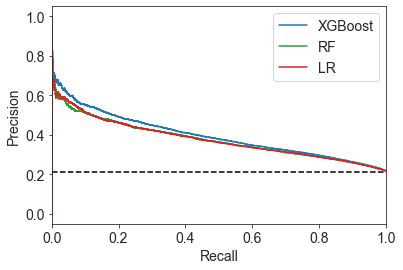

In [121]:
y_valid_pred_xgb = search.best_estimator_.predict(X_valid)
y_valid_proba_xgb = search.best_estimator_.predict_proba(X_valid)

print('Validation Accuracy:', accuracy_score(y_valid, y_valid_pred_xgb))
print(confusion_matrix(y_valid, y_valid_pred_xgb))
print('f1-score:', f1_score(y_valid, y_valid_pred_xgb))
print('Recall:', recall_score(y_valid, y_valid_pred_xgb))

precision, recall, threshold = precision_recall_curve(y_valid, y_valid_proba_xgb[:,1])

aucpr = auc(recall, precision)

print('Validation AUCPR:', aucpr)

fig, ax = plt.subplots(figsize=(6,4))
plt.axhline(y_valid.value_counts(normalize=True).loc[1], color='black', ls='dashed')
plt.plot(recall, precision, color='C0', label='XGBoost')
plt.plot(recall_rf, precision_rf, color='C2', label='RF')
plt.plot(recall_lr, precision_lr, color='C3', label='LR')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size':14})
plt.xlim([0, 1])

We observe that from gradient boosting, more than 30% of the loan applications are predicted to be paid off, meaning investors who would use the classifier would give more than 30% of these applications lower interest rates. Given this similar rate, we note that the recall for defaulted loans is higher than from the logistic regression model. We also note a higher area under the precision recall curve (AUCPR), indicating the model's better predictive performance over the logistic regression model. This can prove to be a useful model to aid the Lending Club in automating loan underwriting, although the client may also be interested in considering logistic regression for speed and simplicity with a small performance tradeoff. 

Let us apply our gradient boosting model on the held out test dataset.

In [122]:
y_test_pred_xgb = search.best_estimator_.predict(X_test)
y_test_proba_xgb = search.best_estimator_.predict_proba(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred_xgb))
print(confusion_matrix(y_test, y_test_pred_xgb))
print('f1-score:', f1_score(y_test, y_test_pred_xgb))
print('Recall:', recall_score(y_test, y_test_pred_xgb))

precision, recall, threshold = precision_recall_curve(y_test, y_test_proba_xgb[:,1])

aucpr = auc(recall, precision)

print('Test AUCPR:', aucpr)

Test Accuracy: 0.4685897628114786
[[ 9329 16881]
 [  841  6298]]
f1-score: 0.41546276139587046
Recall: 0.8821963860484662
Test AUCPR: 0.39307436899422427


In [123]:
xgb_feat_df = pd.concat((pd.Series(X_train.columns),
                         pd.Series(search.best_estimator_.feature_importances_)), axis=1)
xgb_feat_df.columns = ['feature', 'feature_importance']
xgb_feat_df.sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
20,acc_open_past_24mths,0.051905
63,verification_status_Verified,0.048289
64,verification_status_Source Verified,0.043153
5,inq_last_6mths,0.036472
0,loan_amnt,0.033160
3,dti,0.032617
45,num_tl_op_past_12m,0.031687
21,bc_open_to_buy,0.031398
66,purpose_credit_card,0.027893
60,home_ownership_MORTGAGE,0.026677


What is interesting is that the feature with the highest feature importance is the number of trades opened in the past 24 months, followed by whether or not Lending Club had to verify the borrowers' income. Another feature that ended up having a high importance ended up being the number of inquiries in the past six months, which indicate past requests to look at a borrower's credit file to determine their risk. It is fitting that a variable related to risk ended up contributing to the model's predictions in the risk of a borrower defaulting on their loan. 

# Conclusion
We have analyzed data from the Lending Club and modeled the risk profiles of the loan applicants. We propose gradient boosted decision trees as a primary model for Lending club to use to automate loan underwriting to aid investors without the need for additional personnel. We alternatively propose a faster and simpler logistic regression model that has comparable performance. With our models, investors will likely detect about 88% of borrowers who are likely to default on their loans while allowing at least 30% of the loans to receive lower interest rates (with the assumption that a majority of these loans would be fully paid off). 

Typical profiles of borrowers who may default on their loans would include lower incomes, occupations with lower job security, the intent to use the loan for purposes like supporting their small businesses, high debt to income ratios, and large number of trades opened in the 24 months. Our models have been able to capture risky characteristics of borrowers. In this hypothetical situation, we would hope that the Lending Club would see a boost in their business through a higher number of processed applications while earning profits.